In [1]:
import pandas as pd
import os 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
from matplotlib import rc

In [2]:
xl = pd.ExcelFile('CrimeData.xlsx')

#Create dict and append dataframes to dictionary
dfs = {}
counter=0
for i in xl.sheet_names:
    dfs[counter] = xl.parse(i) 
    counter+=1

arrests_by_ethnicity = dfs[0].iloc[:,:8].copy()

search_stop = dfs[1].copy()

In [3]:
arrests_by_ethnicity.head()

,Year,White,Black (or Black British),Asian (or Asian British),Mixed,Chinese or Other,Not stated,Total
0,2006/07,1086449,104888,67542,40092,19348,105243,1423562
1,2007/08,1126577,108937,72521,39870,21046,58436,1427387
2,2008/09,1137578,111064,76298,39354,20885,32288,1417467
3,2009/10,1064049,110712,75800,39371,20184,32371,1342487
4,2010/11,1035418,112816,77469,39985,19492,25048,1310228


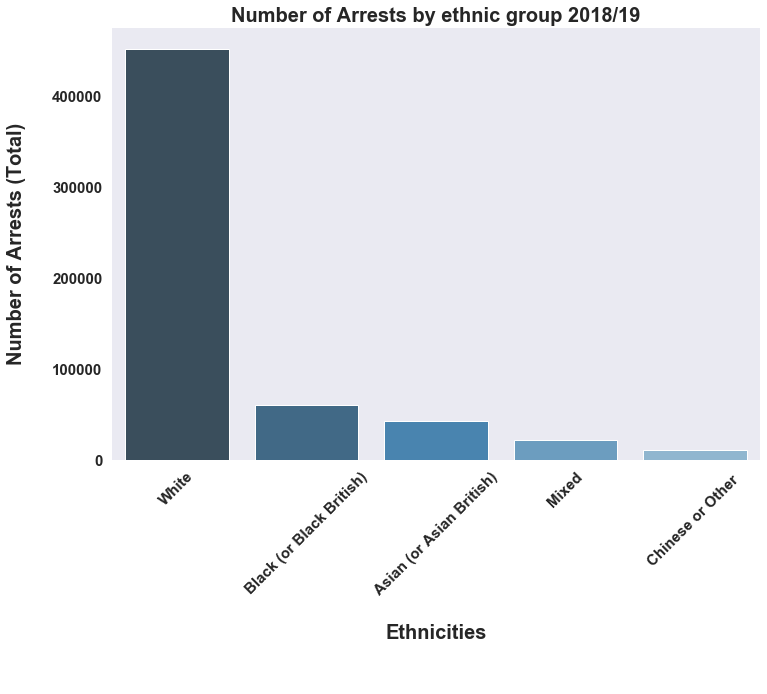

In [25]:
sns.set()

#Set font styles 


fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
eths = list(arrests_by_ethnicity.columns[1:-2])
data = [452320,  60116,  42872,  21832,  11148]
sns.barplot(eths,data,palette=("Blues_d"))
plt.xticks(rotation=45, fontsize=15,weight='bold')
plt.yticks(fontsize=15, weight='bold')
plt.ylabel('Number of Arrests',fontsize=15, weight='bold')
#Set labels for x and y axes
plt.xlabel('''
Ethnicities\n\n''',fontsize=20,weight='bold')
plt.ylabel('Number of Arrests (Total)\n',fontsize=20,weight='bold')
plt.title('Number of Arrests by ethnic group 2018/19',fontsize=20,weight='bold')
sns.set_context("poster")
sns.set_style('white')
ax.grid(False)
sns.despine(bottom = True, left = True)
plt.show()

In [5]:
total_arrests = np.sum([452320,  60116,  42872,  21832,  11148])
arr_pct = round((60116/total_arrests)*100,2)
arr_pct

10.22

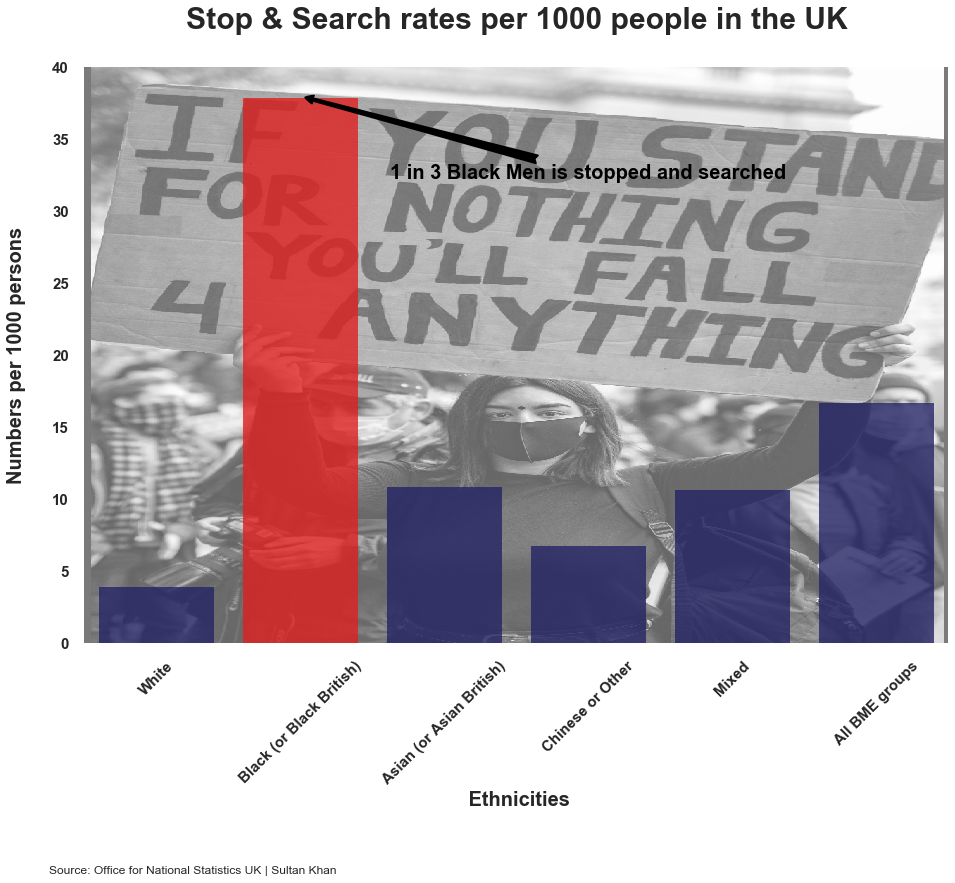

In [23]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,2,2],autoscale_on=True)

sns.set_style("white")

img = plt.imread("protest.png", format='png')

#Show image, create extent to determine sizing of the image
plt.imshow(img,aspect='auto', zorder=0, extent=[-0.5, 5.5, 0, 40.0],alpha=0.6)

#Create crime values
cr_data = search_stop.iloc[-1,1:].values
eths_s = search_stop.columns[1:]
#Rotation of xticks and clean up y labels
plt.xticks(rotation=45,fontsize = 15, weight = 'bold')
plt.yticks(fontsize= 15, weight='bold')

#Set labels for x and y axes
plt.xlabel(''' Ethnicities\n 
''',fontsize=20,weight='bold')
plt.ylabel('Numbers per 1000 persons\n',fontsize=20,weight='bold')

#Highlight bar of importance
clrs = ['midnightblue' if (x < max(cr_data)) else 'red' for x in cr_data]
#Plot bar plot
sns.barplot(eths_s,cr_data,palette=clrs,alpha=0.8,zorder=1,edgecolor=None, linewidth='.001',saturation=0.75)
#Create annotation and arrow styling
plt.annotate('1 in 3 Black Men is stopped and searched',
ha = 'center', va = 'bottom',
xytext = (3, 32),
xy = (1, 38),
arrowprops = { 'arrowstyle' : 'fancy','color':'black','shrinkA':5,'shrinkB':5},color='black',fontname='Arial', fontsize=20,weight='bold')
sns.set_context("poster")

ax2.set_title(label= 'Stop & Search rates per 1000 people in the UK\n', fontname='Arial', fontsize=30,weight='bold')


txt = 'Source: Office for National Statistics UK | Sultan Khan'
plt.figtext(0.25, -.8, txt, wrap=True, horizontalalignment='center', fontsize=12)

#Remove spine from plots 
sns.despine(bottom = True, left = True)
